# Linear Regression : 


      - 

## `1.` Data Wrangling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\kssee\Desktop\DATA FILES\train.csv")
test = pd.read_csv(r"C:\Users\kssee\Desktop\DATA FILES\test.csv")

In [3]:
print(train.head())
print(test.head())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


In [4]:
print('Shape of training data : ' + str(train.shape))
print('Shape of testing data : ' + str(test.shape))

Shape of training data : (700, 2)
Shape of testing data : (300, 2)


## `2.` Data Cleaning 

In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


- ### Missing values

In [6]:
print(train.isna().sum())
print(test.isna().sum())

x    0
y    1
dtype: int64
x    0
y    0
dtype: int64


In [7]:
train=train.dropna()
train.isna().sum()

x    0
y    0
dtype: int64

In [8]:
print(train.describe())
print(test.describe())

                x           y
count  699.000000  699.000000
mean    50.014306   49.939869
std     28.954560   29.109217
min      0.000000   -3.839981
25%     25.000000   24.929968
50%     49.000000   48.973020
75%     75.000000   74.929911
max    100.000000  108.871618
                x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


## `3.` Visualization of train dataset

### `3.1` Histograms

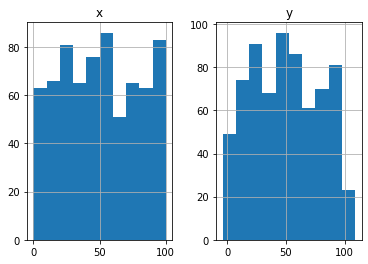

In [9]:
train.hist()
plt.show()

### `3.2` Scatter Plot

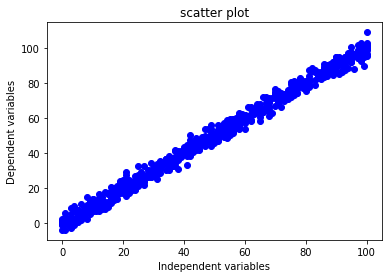

In [10]:
plt.scatter(x=train.x, y=train.y, c='blue')
plt.title('scatter plot')
plt.xlabel('Independent variables')
plt.ylabel('Dependent variables')
plt.show()

**Analyse if linear regression would be a good fit on this problem** 

### `3.3` Boxplots 

A better understanding of boxplot would be given by the below image

<img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?w=1090">

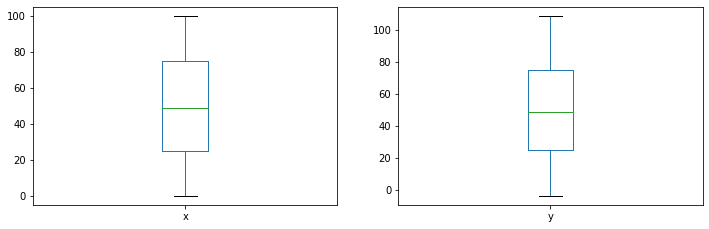

In [11]:
train.plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8))
plt.show()

 Split into `dependent` and `independent` variable and name them `y` and `X` respectively**

In [12]:
X = train.x.values
y = train.y.values

## `4.` Parameter Functions

 Let's find the slop of regression line(m) and bais(y-intercept). you can find these using diffrente approaches. Like:- Ordinary Least Square approach and Gradient Descent approach.
 
- ### Ordinary Least Square
 As you know that the relationship between independent(X) variable and dependent(y) variable is know as linear regression.
 
 **Orinary Least Sqaure** - the sum of the squares of the differences between an observationâ€™s actual and estimated values.
![Regression image](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/06/Least-Square-Method-2-399x300.png) 
Total error of this model is the sum of all errors of each point. ie.

$$SE=\sum_{i=1}^nDi^2$$

    Di = Distance between line and ith point.
    n = Total number of points
### Let's start Implementation
    1. Calculate Mean and Variance
    2. Calculate Covariance.
    3. Estimate Coefficients.
    4. Make prediction
    5. Evaluating Model with RMSE

### `4.1`   Mean and Variance 
Mean of numbers can be calculated as: -

    mean(x) = sum(x) / count(x)

In [13]:
def mean(numbers):
    return sum(numbers) / float(len(numbers))

def variance(numbers, mean):
    return sum([abs(x-mean)**2 for x in numbers])

In [14]:
### START CODE HERE 
X_mean, y_mean = mean(X), mean(y)
X_variance = variance(X, X_mean)
y_variance = variance(y, y_mean)
### END CODE

### `4.2` Calculate Covariance
covariance can describe the relationship between two or more groups of numbers. It is a generalization of correlation. Correlation describes the relationship between two groups of numbers.
 
you can calculate the covariance between two variables as follows: 
       
       covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))


In [15]:
def covariance(X, X_mean, y, y_mean):
    ln = len(X)
    cov = 0.0
    for i in range(ln):
        cov += ((X[i] - X_mean) * (y[i] - y_mean))
    return cov

### `4.3` Coefficients
Estimate two coefficients in simple linear regression. which is m and b.

    m = covariance() / variance()
    b = mean(y) - (m*mean(X))

In [16]:
def coefficients():
    m = covariance(X, X_mean, y, y_mean) / variance(X, X_mean)
    b = y_mean - (m*X_mean)
    return [m,b]

you have estimated the coefficients. Now, you can use them to make predictions follows by this eqation: -

       y = mX + b
 

### `4.4` Splitting Test Data 

In [17]:
X_test = test['x'].values.reshape(-1, 1)
y_test = test['y'].values.reshape(-1, 1)

## `5.` Linear Regression Model and Predictions

In [18]:
def simple_linear_regression():
    prediction = list()
    m, c = coefficients()
    for test in X_test:
        y_pred = m*test[0] + c
        prediction.append(y_pred)
    return prediction

In [19]:
predict = simple_linear_regression()

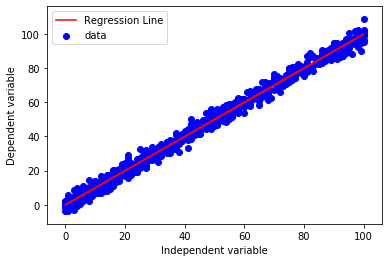

In [20]:
# Ploting Line
plt.plot(X_test, predict, c='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, label='data', c='blue')

plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()
plt.show()

## `6.` RMSE Function Building and Calculation
We need to find how good is our model. There are many methods to evaluate models. Here we will use **Root Mean Sqare Error** 

**Root Mean Sqare Error** is the square root of the sum of all errors divided by the number of values.
![RMSE](https://cdn-images-1.medium.com/max/800/1*SGBsn7WytmYYbuTgDatIpw.gif)
Here yhat is the ith predicted output values , yhat= mX + c


In [21]:
### START CODE HERE (Write code where '#' is given) 
def root_mean_sqaure_error():
    rmse = 0.0
    m, c = coefficients()
    for i in range(len(X_test)):
        yhat = m*X_test[i] + c
        rmse += (y_test[i] - yhat)**2
    rmse = np.sqrt(rmse/len(X_test))
    rmse = rmse[0]
    return rmse

### END CODE 

In [22]:
### START CODE HERE 
#Root Mean Sqare Error
RMSE = root_mean_sqaure_error()
RMSE
### END CODE 

3.0713062680298298